# HW1 : Data Science in Twitter Data
Ken Morton

## Data Collection: Download Twitter Data using API

* As the first step of Data Science process, let's collect some twitter data. Choose a keyword and search tweets containing the keyword by using Twitter search API, and then download the searched tweets (including the meta data that the Search API returns) in a file. It is recommended that the number of searched tweets should be at least 300.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [6]:
import twitter
import json
from urllib.parse import unquote

# Function used to login to the twitter API
def oauthLogin():
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = 'INSERT_API_KEY_HERE'
    CONSUMER_SECRET = 'INSERT_API_SECRET_KEY_HERE'
    OAUTH_TOKEN = 'INSERT_ACCESS_TOKEN_HERE'
    OAUTH_TOKEN_SECRET = 'INSERT_ACCESS_TOKEN_SECRET_HERE'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitterAPI = twitter.Twitter(auth=auth)
    return twitterAPI

# Login to the twitter API
twitterAPI = oauthLogin();

query = 'celtics' # The term to search twitter with
count = 100 # Number of tweets to retrieve per batch
tweetCount = 0 # Total number of tweets retrieved

print("Retrieving tweets...")

# Search twitter and get statuses
searchResults = twitterAPI.search.tweets(q=query, count=count)
statuses = searchResults['statuses']

# Iterate through 3 more batches of results by following the cursor
for _ in range(3):
    try:
        nextResults = searchResults['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break

    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(nextResults[1:]).split("&") ])

    searchResults = twitterAPI.search.tweets(**kwargs)
    statuses += searchResults['statuses']

# Determine how many tweets were retrieved
tweetCount = len(statuses)
print("Finished retrieving ", tweetCount, " tweets, now writing to file.");

# Save to a file
with open('twitterData.json', 'w') as outfile:  
    json.dump(statuses, outfile, indent=4)

Retrieving tweets...
Finished retrieving  386  tweets, now writing to file.


In [7]:
### Report  statistics about the tweets you collected 

In [8]:
print("What keyword did you choose?: ", query)

What keyword did you choose?:  celtics


In [9]:
print("The total number of tweets collected: ", tweetCount)

The total number of tweets collected:  386


# Data Exploration: Exploring the Tweets and Tweet Entities

**(1) Word Count:** 
* Load the tweets you collected in the local file (txt or json)
* compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 most-frequent words with their counts

In [10]:
import operator 
import json
from collections import Counter
from prettytable import PrettyTable

# Read in the tweet data
with open('twitterData.json') as file:
    twitterData = json.loads(file.read())

# Obtain the texts of the tweets
statusTexts = [status.get('text') 
                for status in twitterData]

# Obtain list of all the words in the twitter statuses
words = [word 
         for t in statusTexts 
             for word in t.split()]

# Pass our words to a Counter
counter = Counter(words) 
  
# Get the most common words
mostCommonWords = counter.most_common(30)

# Print our data to a nice table
table = PrettyTable()
table.field_names = ["Word", "Count"]

for word in mostCommonWords:
    table.add_row([word[0], word[1]])

print(table)

+----------+-------+
|   Word   | Count |
+----------+-------+
|   the    |  317  |
| Celtics  |  214  |
|    RT    |  178  |
|   and    |   81  |
|    to    |   74  |
|    in    |   68  |
|    a     |   67  |
|    on    |   65  |
|    I     |   51  |
|   for    |   49  |
| @celtics |   41  |
|   team   |   41  |
|   The    |   40  |
| Aldridge |   38  |
|    48    |   38  |
|   this   |   36  |
| LaMarcus |   35  |
|  Spurs   |   34  |
|   Brad   |   33  |
|  Boston  |   32  |
| Stevens  |   32  |
|   from   |   31  |
|   was    |   30  |
| dropped  |   30  |
|    70    |   30  |
|  Devin   |   28  |
|    he    |   28  |
|  after   |   28  |
|  Booker  |   27  |
|   when   |   27  |
+----------+-------+


** (2) Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 most-retweeted tweets in your collection, i.e., the tweets with the largest number of retweet counts.


In [11]:
from operator import itemgetter
import textwrap

# Get tweet and its retweet count
retweetData = [{"tweet": item.get('text'), "retweets": int(item.get('retweet_count'))}
               for item in twitterData]

# Sort tweets in descending order by number of retweets
sortedDecending = sorted(retweetData, key=itemgetter("retweets"), reverse=True)

# Print our data to a nice table
table = PrettyTable()
table.field_names = ["Tweet", "Retweets"]

for t in sortedDecending[:10]:
    table.add_row([textwrap.fill(t["tweet"], 75), t["retweets"]])

print(table)

+----------------------------------------------------------------------------+----------+
|                                   Tweet                                    | Retweets |
+----------------------------------------------------------------------------+----------+
| RT @SLAMonline: Devin Booker was only 20 when he dropped 70 on the Celtics |   3082   |
|                          https://t.co/eGqzEnEIFC                           |          |
| RT @SLAMonline: Devin Booker was only 20 when he dropped 70 on the Celtics |   3082   |
|                          https://t.co/eGqzEnEIFC                           |          |
| RT @SLAMonline: Devin Booker was only 20 when he dropped 70 on the Celtics |   3082   |
|                          https://t.co/eGqzEnEIFC                           |          |
| RT @SLAMonline: Devin Booker was only 20 when he dropped 70 on the Celtics |   3082   |
|                          https://t.co/eGqzEnEIFC                           |          |
| RT @SLAM

**(3) Find the most popular Tweet Entities in your collection of tweets**

Please plot the top 10 most-frequent hashtags and top 10 most-mentioned users in your collection of tweets.

In [12]:
# Get hashtags
hashtags = [hashtag.get('text')
            for status in twitterData
                for hashtag in status.get('entities').get('hashtags')]

# Get user mentions
userMentions = [userMention.get('screen_name')
                for status in twitterData
                    for userMention in status.get('entities').get('user_mentions')]

# Get the most common hashtags and user mentions
mostCommonHashtags = Counter(hashtags).most_common(10)
mostMentionedUsers = Counter(userMentions).most_common(10)

# Print our hashtag data to a nice table
hashtagTable = PrettyTable()
hashtagTable.field_names = ["Most Common Hashtags", "Count"]

for h in mostCommonHashtags:
    hashtagTable.add_row([h[0], h[1]])

print(hashtagTable)

# Print our user data to a nice table
mentionedUserTable = PrettyTable()
mentionedUserTable.field_names = ["Most Mentioned Users", "Count"]

for u in mostMentionedUsers:
    mentionedUserTable.add_row([u[0], u[1]])

print(mentionedUserTable)

+----------------------+-------+
| Most Common Hashtags | Count |
+----------------------+-------+
|       Celtics        |   24  |
|        Spurs         |   9   |
|       celtics        |   4   |
|  ReacciónEnCaliente  |   3   |
|        spurs         |   3   |
|        Pacers        |   1   |
|       CELTICS        |   1   |
|       catarsis       |   1   |
+----------------------+-------+
+----------------------+-------+
| Most Mentioned Users | Count |
+----------------------+-------+
|       celtics        |   56  |
|      SLAMonline      |   21  |
|        BR_NBA        |   20  |
|    SIChrisMannix     |   17  |
|     IarocciDave      |   15  |
|     Max_Lederman     |   15  |
|    Celtics_fan78     |   11  |
|    HoopsReference    |   11  |
|      Frogman980      |   8   |
|      SixersAdam      |   7   |
+----------------------+-------+


Plot a histogram of the number of user mentions in the list using the following bins.

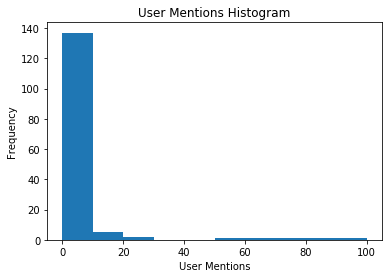

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# Our histogram bins
bins = [0, 10, 20, 30, 40, 50, 100]

# Add a title and axis labels
plt.title("User Mentions Histogram")
plt.ylabel("Frequency")
plt.xlabel("User Mentions")

# Draw a histogram
userMentionCounter = Counter(userMentions)
plt.hist(list(userMentionCounter.values()), bins)

plt.show()

* choose a popular twitter user who has many followers in your collection of tweets.
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [14]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary







*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

** How to submit: **

        Please submit through Canvas, in the Assignment "HW1".
        